Physics 215 (1st Semester AY 2022-2023)

Richelle Jade L. Tuquero

# Session 2 Measuring Code Performance

**OBJECTIVE**: Submit a performance analysis of a self-implemented physics textbook function or constant using Julia benchmarking tools.

- [X] KR1: Implemented (customized) at least one math/physics textbook function, or constant (prefer those that involve a sum or a loop) in Julia. Discuss its importance in Physics. See Resources in the webpage.
- [X] KR2: Compare the performance (accuracy) of the implemented function in comparison with the existing special functions within Julia (or a reliable module)
- [X] KR3: Successful loading of the `BenchmarkTools` module. May need to add it first via the `Pkg` or REPL package mode.
- [X] KR4: Itemized differences between `@time`, `@btime`, `@benchmark` and other `@time`-like macros. Nice if the situations when they are best applied are mentioned.
- [X] KR5: Identified demonstrated useful features within the `Profiler` module of Julia. Features must be explained why useful for your case.
- [X] KR6: A discussion of the performance of the implemented function above.

In [1]:
using Pkg;
Pkg.activate("."); #local environment
Pkg.add("SpecialFunctions");
Pkg.add("BenchmarkTools");
Pkg.add("Plots");
Pkg.add("Profile");
Pkg.add("ProfileView");
Pkg.add("ProfileSVG");

Pkg.update()
Pkg.status();

  Activating project at `~/Desktop/Physics 215/Submission/Session 2`
    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/Desktop/Physics 215/Submission/Session 2/Project.toml`
  No Changes to `~/Desktop/Physics 215/Submission/Session 2/Manifest.toml`
   Resolving package versions...
  No Changes to `~/Desktop/Physics 215/Submission/Session 2/Project.toml`
  No Changes to `~/Desktop/Physics 215/Submission/Session 2/Manifest.toml`
   Resolving package versions...
  No Changes to `~/Desktop/Physics 215/Submission/Session 2/Project.toml`
  No Changes to `~/Desktop/Physics 215/Submission/Session 2/Manifest.toml`
   Resolving package versions...
  No Changes to `~/Desktop/Physics 215/Submission/Session 2/Project.toml`
  No Changes to `~/Desktop/Physics 215/Submission/Session 2/Manifest.toml`
   Resolving package versions...
  No Changes to `~/Desktop/Physics 215/Submission/Session 2/Project.toml`
  No Changes to `~/Desktop/Physics 2

Status `~/Desktop/Physics 215/Submission/Session 2/Project.toml`
  [6e4b80f9] BenchmarkTools v1.3.1
  [91a5bcdd] Plots v1.35.3
  [132c30aa] ProfileSVG v0.2.1
  [c46f51b8] ProfileView v1.5.2
  [276daf66] SpecialFunctions v2.1.7
  [9abbd945] Profile


In [2]:
using Plots

# KR1
Implemented (customized) at least one math/physics textbook function, or constant (prefer those that involve a sum or a loop) in Julia. Discuss its importance in Physics. See Resources in the webpage.

## Beta and Gamma Function
Special functions are mathematical expressions with a known expression or notation which results to unique value depending on the value of the input. Examples of these special functions is the **Beta** and **Gamma** functions.

These functions are helpful in simplifying complicated integrals and/or expressions in mathematics and physics into simpler functions. They are also present in probabilities and statistics. This was first used in the calculations of the amplitude of Regge trajectories in string theory and quantum hydrodynamics.

The Beta function, as discussed in [Arfken-Weber-Harris, Mathematical Methods for Physicists](https://www.sciencedirect.com/book/9780123846549/mathematical-methods-for-physicists), is useful for simplifying integrals with powers of sin and cosine functions. Its integral form is given by
\begin{equation}
B (p, q) = 2\int_0^{\pi/2} \cos^{2p-1}\theta \sin^{2q-1}d\theta.
\end{equation}
However, the Beta function is also used for the product of gamma function $\Gamma$ such that it is also defined as
\begin{equation}
B(p, q) = \frac{\Gamma(p)\Gamma(q)}{\Gamma(p+q)}
\end{equation}
where 
\begin{equation}
\Gamma(n) = (n-1)!
\end{equation}
when $n$ is a positive integer.

Before we begin, let us first determine if there are pre-existing functions with the same name as ``my_beta`` and ``my_gamma``.

In [3]:
? my_beta

search:

Couldn't find my_beta
Perhaps you meant Meta


No documentation found.

Binding `my_beta` does not exist.


In [4]:
? my_gamma

search:

Couldn't find my_gamma
Perhaps you meant mapc


No documentation found.

Binding `my_gamma` does not exist.


Since there are none, we now begin defining our functions.

In [5]:
"""
    my_gamma( n )
Determines the value of gamma when n is a positive integer
by getting (n-1)!.
Input: n is a positive integer.
Output: the factorial of (n-1)
"""
function my_gamma( n )
    prod = 1
    for i in range(1, n-1)
        prod *= BigInt(i)
    end
    return prod
end

my_gamma

In [6]:
"""
    my_beta( p, q )
Calculates the value of the beta function when p and q are positive integers.
This is done by using the function ``gamma``.
Input: p and q input variables
Output: The beta function.
"""
function my_beta( p, q )
    return my_gamma( p )*my_gamma( q )/my_gamma( p+q )
end

my_beta

Notice that we use ``BigInt`` for the function ``gamma`` since this is in case when the default ``Int64`` is not enough. If we do not include ``BigInt`` then we will have the wrong or negative value when we multiply higher integers.

## Plotting ``my_beta``
We will now implement ``my_beta`` when ``p = 5`` and ``q`` varies.

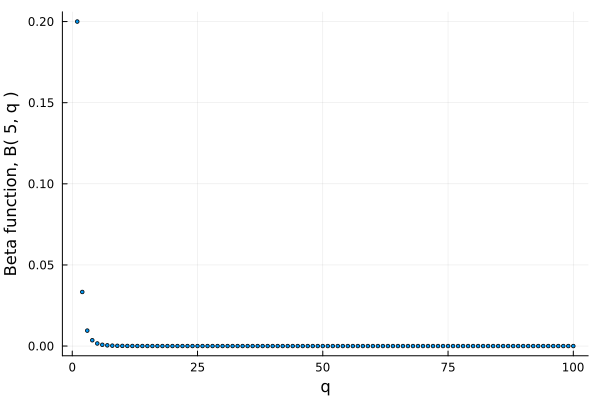

In [7]:
p0 = 5
qRange = range(1, 100; step = 1);
soln_beta = [ my_beta( p0, i) for i in qRange ]
scatter(qRange, soln_beta, markersize = 2, xlabel = "q", ylabel = "Beta function, B( 5, q )", legend = false)

# KR2
Compare the performance (accuracy) of the implemented function in comparison with the existing special functions within Julia.

To use the existing special functions within Julia, we added ``SpecialFunctions.jl`` beforehand and now we import ``SpecialFunctions`` to use the module.

In [8]:
using SpecialFunctions

Finally, we implement the special function ``beta`` for the same values or parameters used in ``my_beta``.

In [9]:
beta_julia = [beta(5 , i) for i in qRange];

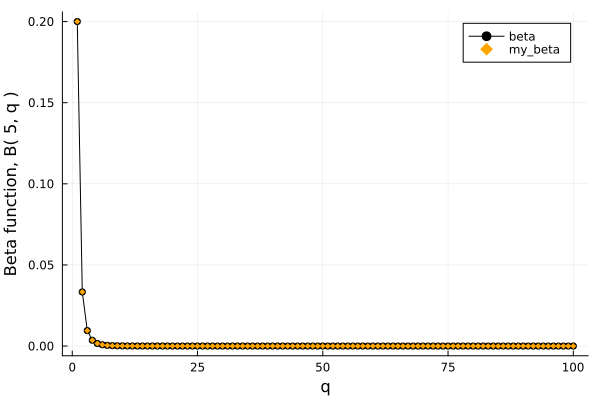

In [10]:
plt = plot(qRange, beta_julia,linecolor=:black, marker=(:circle,:black), markersize = 4, label = "beta")

plot!(plt)
scatter!(qRange, soln_beta, markershape =:diamond, markersize = 3, markercolor =:orange, markerstrokewidth =0,xlabel = "q", ylabel = "Beta function, B( 5, q )", label = "my_beta")


## Checking the accuracy based on the deviation

Let us check if there is any deviation between the two functions.

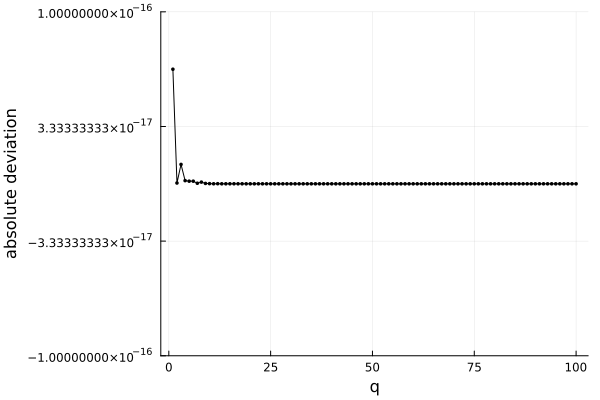

In [11]:
dev = [abs(soln_beta[i]-beta_julia[i]) for i in range(1,length(soln_beta))];

plot(qRange, dev, linecolor =:black, marker=(:circle, :black, 2),
    ylim=(-1e-16, 1e-16), xlabel = "q", ylabel = "absolute deviation", label = false)

In [12]:
# Checking the maximum absolute deviation
println(maximum(dev))
println(minimum(dev))

6.661338147750939242541790008544921874999999999999999999999999956819157224527777e-17
4.457094261045808435439260556100480908509904874457873558073475611318921948569866e-27


Both the function ``my_beta`` and ``beta`` follow the same trend. It decreases as ``q`` increases while ``p`` is kept constant. To get a better idea on how accurate the performance of ``my_beta``, we determine the absolute deviation per each value of ``q``. As shown, there is only a maximum deviation in the order of $10^{-17}$ from the result of the function ``my_beta`` from ``beta``. Moreover, this deviation is present for lower values of ``q``. Therefore, the result for the ``my_beta`` is accurate since the deviation between the two function is relatively small. Hence, we can determine the value of the Beta function $B(p, q)$ provided that $p$ and $q$ are positive integers using ``my_beta``.

# KR3
Successful loading of the BenchmarkTools module. May need to add it first via the Pkg or REPL package mode.

Since we already added the ``BenchmarkTools.jl`` using ``Pkg.add("BenchmarkTools")``, we now import the module ``BenchmarkTools`` to use its macros for benchmarking.

In [13]:
using BenchmarkTools

The ``BenchmarkTools`` allows us to use the ``@btime`` and ``@benchmark`` macros.

In [14]:
? @btime

```
@btime expression [other parameters...]
```

Similar to the `@time` macro included with Julia, this executes an expression, printing the time it took to execute and the memory allocated before returning the value of the expression.

Unlike `@time`, it uses the `@benchmark` macro, and accepts all of the same additional parameters as `@benchmark`.  The printed time is the *minimum* elapsed time measured during the benchmark.


In [15]:
? @benchmark

```
@benchmark <expr to benchmark> [setup=<setup expr>]
```

Run benchmark on a given expression.

# Example

The simplest usage of this macro is to put it in front of what you want to benchmark.

```julia-repl
julia> @benchmark sin(1)
BenchmarkTools.Trial:
  memory estimate:  0 bytes
  allocs estimate:  0
  --------------
  minimum time:     13.610 ns (0.00% GC)
  median time:      13.622 ns (0.00% GC)
  mean time:        13.638 ns (0.00% GC)
  maximum time:     21.084 ns (0.00% GC)
  --------------
  samples:          10000
  evals/sample:     998
```

You can interpolate values into `@benchmark` expressions:

```julia
# rand(1000) is executed for each evaluation
julia> @benchmark sum(rand(1000))
BenchmarkTools.Trial:
  memory estimate:  7.94 KiB
  allocs estimate:  1
  --------------
  minimum time:     1.566 μs (0.00% GC)
  median time:      2.135 μs (0.00% GC)
  mean time:        3.071 μs (25.06% GC)
  maximum time:     296.818 μs (95.91% GC)
  --------------
  samples:          10000
  evals/sample:     10

# rand(1000) is evaluated at definition time, and the resulting
# value is interpolated into the benchmark expression
julia> @benchmark sum($(rand(1000)))
BenchmarkTools.Trial:
  memory estimate:  0 bytes
  allocs estimate:  0
  --------------
  minimum time:     101.627 ns (0.00% GC)
  median time:      101.909 ns (0.00% GC)
  mean time:        103.834 ns (0.00% GC)
  maximum time:     276.033 ns (0.00% GC)
  --------------
  samples:          10000
  evals/sample:     935
```


We will use the macros of the ``BenchmarkTools`` module in KR4.

# KR4
Itemized differences between ``@time``, ``@btime``, ``@benchmark`` and other ``@time``-like macros. Nice if the situations when they are best applied are mentioned.

Before we include the itemized differences of ``@time``, ``@btime``, ``@benchmark``, ``@elapsed``, and ``@timev``, we first implement the macros for both the function ``my_beta`` and ``beta`` when ``p =5`` and ``q=1000`` to get a better idea on what it does and its output.

In [16]:
qR = 1:100_000  # Used for implementing 100,000 samples or runs of the function.

1:100000

### Implementing ``@time``

In [17]:
time = @time for _ in qR my_beta(5, 1000) end

 73.379869 seconds (1.00 G allocations: 106.995 GiB, 13.64% gc time)


In [18]:
time_1 = @time for _ in qR beta(5, 1000) end

  0.011832 seconds (298.98 k allocations: 6.088 MiB)


### Implementing ``@btime``

In [19]:
btime = @btime for _ in qR my_beta(5, 1000) end

  70.240 s (1004698978 allocations: 106.99 GiB)


In [20]:
btime_1 = @btime for _ in qR beta(5, 1000) end

  11.218 ms (298978 allocations: 6.09 MiB)


### Implementing ``@benchmark``

In [21]:
bench = @benchmark for _ in qR my_beta(5, 1000) end

BenchmarkTools.Trial: 1 sample with 1 evaluation.
 Single result which took 72.206 s (13.13% GC) to evaluate,
 with a memory estimate of 106.99 GiB, over 1004698978 allocations.

In [22]:
bench_1 = @benchmark for _ in qR beta(5, 1000) end

BenchmarkTools.Trial: 436 samples with 1 evaluation.
 Range (min … max):  11.117 ms …  14.779 ms  ┊ GC (min … max): 0.00% … 22.13%
 Time  (median):     11.145 ms               ┊ GC (median):    0.00%
 Time  (mean ± σ):   11.478 ms ± 934.966 μs  ┊ GC (mean ± σ):  2.67% ±  6.48%

  █▁                                                        ▂   
  ██▇█▇▆▆▆▅▅▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▄▄██ ▆
  11.1 ms       Histogram: log(frequency) by time      14.3 ms <

 Memory estimate: 6.09 MiB, allocs estimate: 298978.

Since the ``@benchmark`` was not able to show the histogram for ``my_beta``, we will implement it again for fewer loops.

In [23]:
@benchmark for _ in 1:1_000 my_beta(5, 1000) end

BenchmarkTools.Trial: 8 samples with 1 evaluation.
 Range (min … max):  686.484 ms … 774.144 ms  ┊ GC (min … max): 12.11% … 12.96%
 Time  (median):     698.470 ms               ┊ GC (median):    12.16%
 Time  (mean ± σ):   706.491 ms ±  28.157 ms  ┊ GC (mean ± σ):  12.33% ±  0.41%

  █ █ █  █ █  █ █                                             █  
  █▁█▁█▁▁█▁█▁▁█▁█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁█ ▁
  686 ms           Histogram: frequency by time          774 ms <

 Memory estimate: 1.07 GiB, allocs estimate: 10044000.

### Implementing ``@elapsed``

In [24]:
elapsed = @elapsed for _ in qR my_beta(5, 1000) end

73.745182417

In [25]:
elapsed_1 = @elapsed for _ in qR beta(5, 1000) end

0.012402458

### Implementing ``@timev``

In [26]:
timev = @timev for _ in qR my_beta(5, 1000) end

 75.923838 seconds (1.00 G allocations: 106.995 GiB, 13.71% gc time)
elapsed time (ns):  75923838459
gc time (ns):       10409109050
bytes allocated:    114884783648
pool allocs:        402398978
non-pool GC allocs: 0
malloc() calls:     401500000
realloc() calls:    200800000
free() calls:       401293213
minor collections:  894
full collections:   2


In [27]:
timev_1 = @timev for _ in qR beta(5, 1000) end

  0.012746 seconds (298.98 k allocations: 6.088 MiB)
elapsed time (ns):  12745667
gc time (ns):       0
bytes allocated:    6383648
pool allocs:        298978
non-pool GC allocs: 0
minor collections:  0
full collections:   0


## Itemized list of the macro tested
From the result, we observed the following:

``@time``
- shows the time it takes to run the code including compilation time.
- memory allocation
- can be used to get the information previously mentioned while still returning the code.

``@btime``
- output is similar to ``@time`` which are the time and memory allocations.
- runs like the ``@benchmark``
- gives the minimum time of the benchmark.
- great if only checking for information regarding fastest time ran of the program or function.
- can be used to get the information previously mentioned while still returning the code.

``@benchmark``
- uses multiple samples.
- evaluates parameters.
- gives a more detailed time range which includes the minimum, maximum, and median.
- shows a visual representation or histogram of the time.
- useful in getting more accurate results of the time by giving the range of possible time for multiple samples.

``@elapsed``
- specific for getting the elapsed time only.
- useful in testing individual functions or expressions.
- can be used in checking if the performance of the expression is within the set limit.

``@timev``
- similar to ``@time`` but more diverse information on memory allocation (bytes, pool, and non-pool).
- time is in nanoseconds.
- can be used to get the information previously mentioned while still returning the code.


For all the ``time``-like macros, we observe that ``beta`` is significantly faster than ``my_beta``. Moreover, the default ``beta`` is also more efficient when it comes to memory and allocations as shown by lower values compared to ``my_beta``.

# KR5
Identified demonstrated useful features within the ``Profiler`` module of Julia. Features must be explained why useful for your case.

Since the ``Profiler`` module is already added, we import ``Profile`` and ``ProfileView`` to use the in-built profiler for analyzing the function/s. Additionally, we included ``ProfileSVG`` so that we can show the SVG plot in jupyter notebook.

In [28]:
using Profile
using ProfileView

# We also import ProfileSVG to show the SVG file of Profile in jupyter.
using ProfileSVG

We now run ``@profile`` to run ``my_beta`` 100,000 times in order to get an idea of the execution of the code per lines. This is important to help us determine possible bottlenecks.

In [29]:
@profile for _ in 1:100_000 my_beta(5, 1000) end

Since we want to see the output of the profiler, we implement the ``Profile.print()`` to print the output of ``@profile``.

In [30]:
Profile.print() 

Overhead ╎ [+additional indent] Count File:Line; Function
    4╎4     In[5]:8; my_gamma(n::Int64)
     ╎58    In[5]:11; my_gamma(n::Int64)
     ╎ 42    @Base/gmp.jl:482; *
   42╎  42    @Base/gmp.jl:158; mul(a::BigInt, b::BigInt)
     ╎ 16    @Base/gmp.jl:293; BigInt
   16╎  16    @Base/gmp.jl:204; set_si(a::Int64)
    4╎4     In[6]:8; my_beta(p::Int64, q::Int64)
     ╎1     In[6]:9; my_beta(p::Int64, q::Int64)
     ╎ 1     @Base/gmp.jl:497; /
    1╎  1     @Base/mpfr.jl:429; /(x::BigFloat, y::BigFloat)
  453╎453   @Base/gmp.jl:158; mul(a::BigInt, b::BigInt)
  330╎330   @Base/gmp.jl:204; set_si(a::Int64)
    3╎3     @Base/mpfr.jl:220; BigFloat(x::BigInt, r::Base.MP...
    2╎2     @Base/mpfr.jl:429; /(x::BigFloat, y::BigFloat)
    1╎1     @Base/mpfr.jl:110; BigFloat(; precision::Int64)
    1╎1     @Base/mpfr.jl:112; BigFloat(; precision::Int64)
     ╎12412 @Base/task.jl:484; (::IJulia.var"#15#18")()
     ╎ 12412 ...ia/src/eventloop.jl:8; eventloop(socket::ZMQ.Socket)
     ╎  12412 @Base

To visualize the result of the profiler, we use ``ProfileView.view()`` and included ``ProfileSVG.view()`` as well to show the output in jupyter notebook.

In [31]:
ProfileView.view()

Gtk.GtkWindowLeaf(name="", parent, width-request=-1, height-request=-1, visible=TRUE, sensitive=TRUE, app-paintable=FALSE, can-focus=FALSE, has-focus=FALSE, is-focus=FALSE, focus-on-click=TRUE, can-default=FALSE, has-default=FALSE, receives-default=FALSE, composite-child=FALSE, style, events=0, no-show-all=FALSE, has-tooltip=FALSE, tooltip-markup=NULL, tooltip-text=NULL, window, opacity=1.000000, double-buffered, halign=GTK_ALIGN_FILL, valign=GTK_ALIGN_FILL, margin-left, margin-right, margin-start=0, margin-end=0, margin-top=0, margin-bottom=0, margin=0, hexpand=FALSE, vexpand=FALSE, hexpand-set=FALSE, vexpand-set=FALSE, expand=FALSE, scale-factor=2, border-width=0, resize-mode, child, type=GTK_WINDOW_TOPLEVEL, title="Profile", role=NULL, resizable=TRUE, modal=FALSE, window-position=GTK_WIN_POS_NONE, default-width=800, default-height=600, destroy-with-parent=FALSE, hide-titlebar-when-maximized=FALSE, icon, icon-name=NULL, screen, type-hint=GDK_WINDOW_TYPE_HINT_NORMAL, skip-taskbar-hint

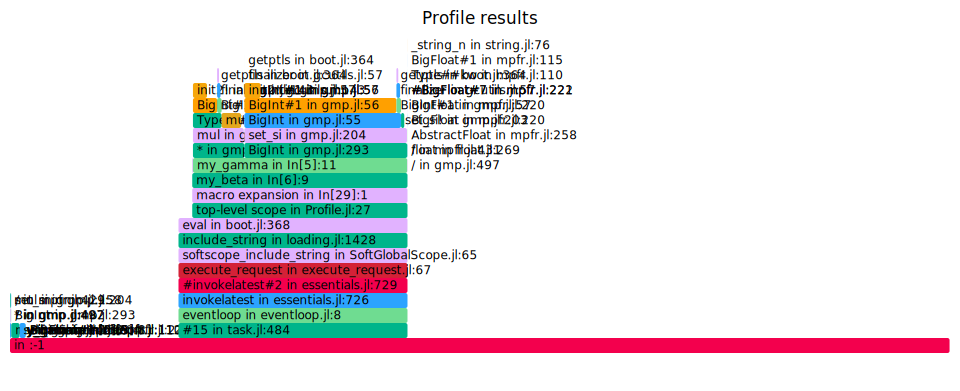

In [32]:
ProfileSVG.view()

Now that we are done using the ``Profile`` module for analyzing our function ``my_beta``, we then erase the memory of the profile. This is done so that we can analyze other functions, in our case it is ``beta``.

In [33]:
Profile.clear()

We then implement the same steps of profiling ``my_beta`` to profile ``beta``.

In [34]:
@profile for _ in 1:100_000 beta(5, 50000) end

In [35]:
Profile.print() #To check the output of profile

Overhead ╎ [+additional indent] Count File:Line; Function
 ╎1 @Base/task.jl:484; (::IJulia.var"#15#18")()
 ╎ 1 @IJulia/src/eventloop.jl:8; eventloop(socket::ZMQ.Socket)
 ╎  1 @Base/essentials.jl:726; invokelatest
 ╎   1 @Base/essentials.jl:729; #invokelatest#2
 ╎    1 ...rc/execute_request.jl:67; execute_request(socket::ZMQ.Socke...
 ╎     1 ...c/SoftGlobalScope.jl:65; softscope_include_string(m::Modu...
 ╎    ╎ 1 @Base/loading.jl:1428; include_string(mapexpr::typeof...
 ╎    ╎  1 @Base/boot.jl:368; eval
 ╎    ╎   1 ...file/src/Profile.jl:27; top-level scope
 ╎    ╎    1 In[34]:1; macro expansion
 ╎    ╎     1 ...tions/src/gamma.jl:752; beta(a::Int64, b::Int64)
 ╎    ╎    ╎ 1 ...ions/src/gamma.jl:786; logabsbeta(a::Int64, b::Int64)
1╎1 ...ctions/src/beta_inc.jl:17; _loggammadiv(a::Float64, b::Float64)
1╎1 ...Functions/src/gamma.jl:786; logabsbeta(a::Int64, b::Int64)
Total snapshots: 4. Utilization: 100% across all threads and tasks. Use the `groupby` kwarg to break down by thread and/o

In [36]:
ProfileView.view()

Gtk.GtkWindowLeaf(name="", parent, width-request=-1, height-request=-1, visible=TRUE, sensitive=TRUE, app-paintable=FALSE, can-focus=FALSE, has-focus=FALSE, is-focus=FALSE, focus-on-click=TRUE, can-default=FALSE, has-default=FALSE, receives-default=FALSE, composite-child=FALSE, style, events=0, no-show-all=FALSE, has-tooltip=FALSE, tooltip-markup=NULL, tooltip-text=NULL, window, opacity=1.000000, double-buffered, halign=GTK_ALIGN_FILL, valign=GTK_ALIGN_FILL, margin-left, margin-right, margin-start=0, margin-end=0, margin-top=0, margin-bottom=0, margin=0, hexpand=FALSE, vexpand=FALSE, hexpand-set=FALSE, vexpand-set=FALSE, expand=FALSE, scale-factor=2, border-width=0, resize-mode, child, type=GTK_WINDOW_TOPLEVEL, title="Profile", role=NULL, resizable=TRUE, modal=FALSE, window-position=GTK_WIN_POS_NONE, default-width=800, default-height=600, destroy-with-parent=FALSE, hide-titlebar-when-maximized=FALSE, icon, icon-name=NULL, screen, type-hint=GDK_WINDOW_TYPE_HINT_NORMAL, skip-taskbar-hint

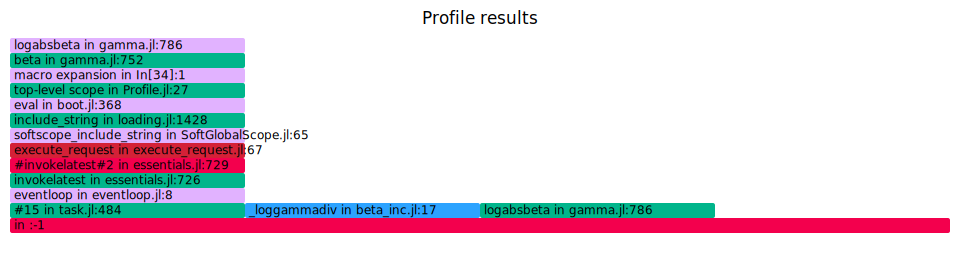

In [37]:
ProfileSVG.view()

### KR5 discussion on the ``Profile`` module

The ``Profile`` module is useful in letting us examine our code, specifically helping us determine the possible bottlenecks. The profiler inspects the function and system by using a sampling profiler. As shown, we use ``@profile`` which runs our function through periodic backtraces and helps us determine the frequency of the execution of the lines of codes. To get a printed description of the result of ``@profile`` for multiple runs, we use ``Profile.print()`` which will give us a text-based display of ``@profile``. From this, we can examine the frequency of some lines of codes. We notice that the number on the left side of each lines printed from ``Profile`` corresponds to the frequency of it being called or the number of times it is sampled. Each lines are hierarchical list of the path and library used, as well as the corresponding line number. From this, we can already determine which lines of code takes most of the time when running the code, hence possible bottlenecks.

Lastly, we use ``ProfileView.view`` to visualize the result of ``@profile`` by plotting a flame graph. Thus, instead of manually looking for higher numbers we can just look at the plot to check for the frequency of sampling instead. Note that we have also included the use of ``ProfileSVG.view()`` so that we can render the SVG data into plots which can be seen in jupyter notebook. This is helpful since ``ProfileView.view`` shows the plot in a separate window.

After using ``@profile`` and showing its result in text and plot, we can erase the memory of the profile by using ``Profile.clear()``. This is useful if we want to start again or if we want to get the profile of another function, just like in my case of ``my_beta`` and ``beta``.








# KR6
A discussion of the performance of the implemented function above.

We check the ratio of the median of the speed of ``my_beta`` and ``beta`` from the result of the ``@benchmark``.

In [38]:
ratioB = median(bench_1.times)/median(bench.times)
bestB = minimum(bench_1.times)/median(bench.times);

In [39]:
# Showing the result of the ratio
@show ratioB
@show bestB;
@show 1/ratioB
@show 1/bestB;

ratioB = 0.00015435239289314748
bestB = 0.00015396085406298616
1 / ratioB = 6478.681549772044
1 / bestB = 6495.1575261520375


The function ``my_beta`` gives an accurate result for varying values of ``q`` when ``p=5``. This is based on the deviation with respect to the Julia function ``beta``, where the maximum deviation is in the order of $10^{-17}$. However, we observe a difference of performance in terms of the elapsed time and memory allocations of the two functions. From the median result of ``@benchmark``, we observe that ``beta`` takes $\approx 0.00016$ of the time it takes to run ``my_beta``. In other words, ``my_beta`` is $\approx 6000$ times slower as compared to the inbuilt function. Furthermore, there is also an observable difference of the memory used as shown by the result in ``@time``, ``@btime``, ``@benchmark``, and ``@timev``. ``my_beta`` takes about ``106.99 GiB`` for 100,000 loops or samples (``1.07 GiB`` for 1,000 loops), while ``beta`` is only ``6.09 MiB``for 100,000 loops or samples.  

The difference in time can be further described by the result of the profiler. We noticed that even though we ran ``my_beta`` and ``beta`` both for 100,000 times, there was a difference in the total number of snapshots where ``my_beta`` is 52737 and ``beta`` is 4. After investigating the result of the profiler, we observed that there is more than half the amount of samples or snapshots for using ``BigInt`` when implementing ``my_gamma`` for ``my_beta``. Thus, this is a possible cause of the bottleneck of our code.